In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#Filtering warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the data
df0=pd.read_csv("AB_NYC_2019.csv")

In [4]:
#Inspecting the data
df0.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [5]:
#Checking the shape
df0.shape

(48895, 16)

### Data Preparartion and Cleaning

In [6]:
#Dropping duplicates
df0=df0.drop_duplicates(subset="id")

In [7]:
#Checking for nulls
null_perc= df0.isnull().sum().sort_values(ascending=False)/len(df0.index)*100
null_perc

last_review                       20.558339
reviews_per_month                 20.558339
host_name                          0.042949
name                               0.032723
id                                 0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

There are no columns with more than 30% null values, we won't be dropping any columns

In [8]:
#dropping columns that are not relevant to our analysis
df0.drop(['id','host_id','host_name','last_review'], axis=1, inplace=True)
#examing the changes
df0.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [9]:
#Checking for nulls
null_perc= df0.isnull().sum().sort_values(ascending=False)/len(df0.index)*100
null_perc

reviews_per_month                 20.558339
name                               0.032723
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [10]:
#replacing all NaN values in 'reviews_per_month' with 0
df0.fillna({'reviews_per_month':0}, inplace=True)

In [11]:
#replacing all NaN values in 'reviews_per_month' with 0
df0.fillna({'name':'NA'}, inplace=True)

## Univariate Analysis

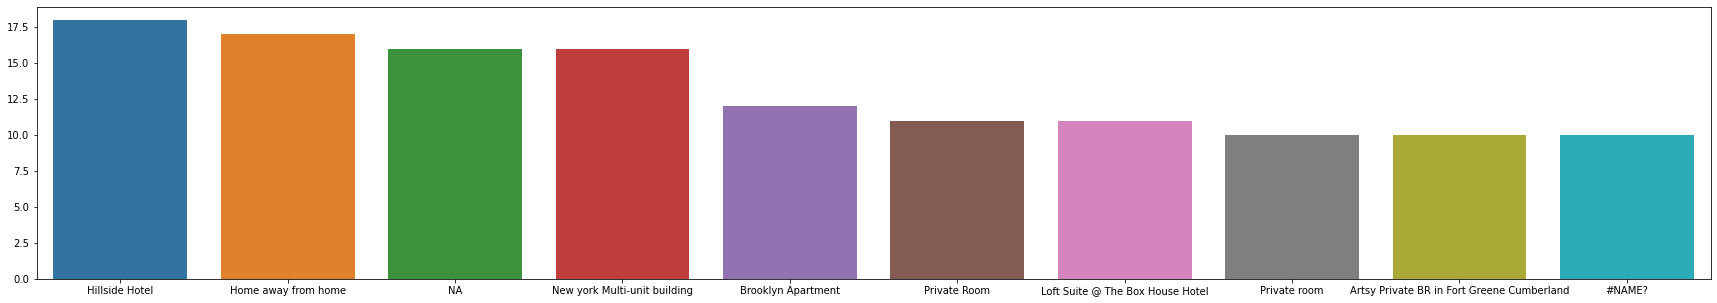

In [12]:
# Top 10 properties
plt.figure(figsize=(30,5))
sns.barplot(x = df0.name.value_counts().index[:10] , y = df0.name.value_counts().values[:10])
plt.show()

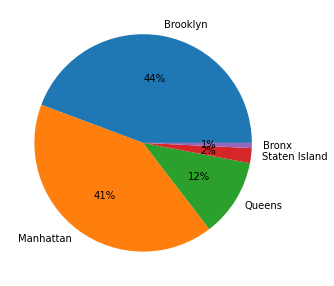

In [13]:
#Neighbourhood Group
plt.figure(figsize=(5,5))
plt.pie(x = df0.neighbourhood_group.value_counts(normalize= True),autopct='%.0f%%',labels=df0.neighbourhood_group.unique())
plt.show()

The above analysis shows that ~85% of listings are in Manhattan and Brooklyn making them the most popular destinations

<function matplotlib.pyplot.show(close=None, block=None)>

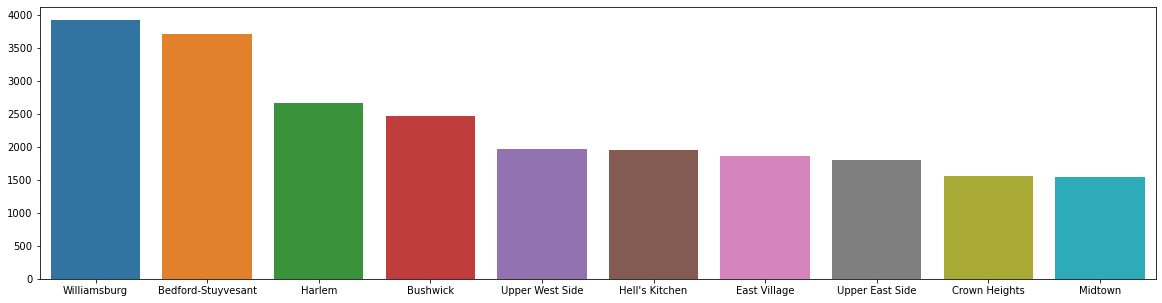

In [14]:
#Top 10 Neighbourhood Group
plt.figure(figsize=(20,5))
sns.barplot(data=df0,x=df0.neighbourhood.value_counts().index[:10],y=df0.neighbourhood.value_counts().values[:10])
plt.show

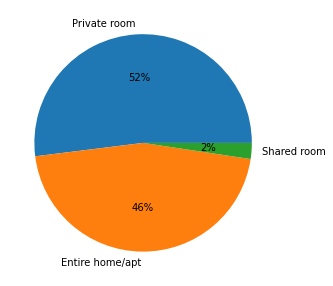

In [15]:
#room type
plt.figure(figsize=(5,5))
plt.pie(x = df0.room_type.value_counts(normalize= True),autopct='%.0f%%',labels=df0.room_type.unique())
plt.show()

98% of guests preffer a private room or entire home/apartment making shared rooms less preferred choice for property type

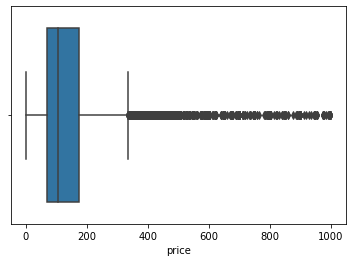

In [47]:
#Price Distribution
df0[df0.price<500]
sns.boxplot(df0[df0.price<1000].price)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

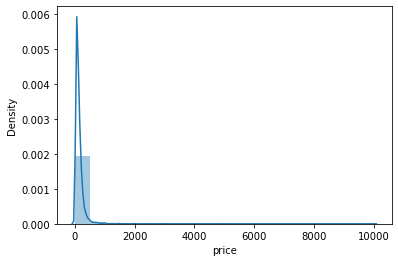

In [17]:
sns.distplot(df0.price,bins=20,)

The above histograms and box plots show that majority of listed properties are relatively low priced (<$400) which shows that tenants prefer cheaper properties on Airbnb

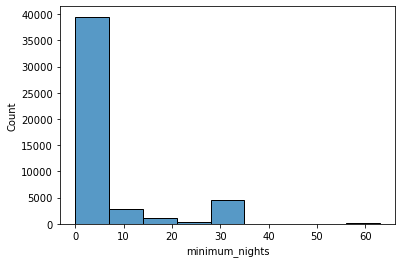

In [46]:
#minimum_nights
sns.histplot(df0.minimum_nights,bins=50,binrange=(0,60),binwidth=7)
plt.show()

Majority of tenants prefer to book establishments with minimum limit of 7 days, with establishments with 30 days stay policy being the second most popular one

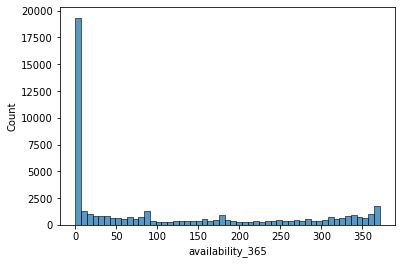

In [45]:
#minimum_nights
sns.histplot(df0.availability_365,bins=20,binwidth=7)
plt.show()

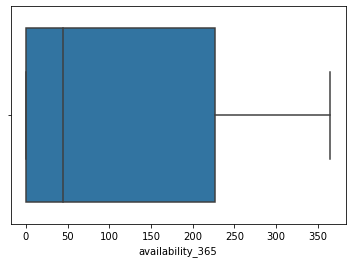

In [44]:
#Price Distribution
sns.boxplot(df0.availability_365)
plt.show()

Majority listings are booked for the entire year 

## Bivariate and Multivariate Analysis

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

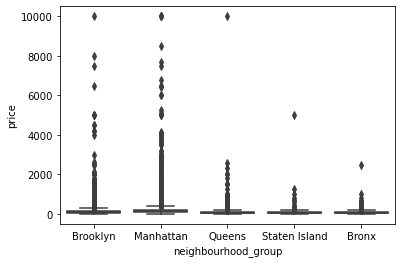

In [21]:
#Price vs neighbourhood
sns.boxplot(data=df0,x='neighbourhood_group',y='price')

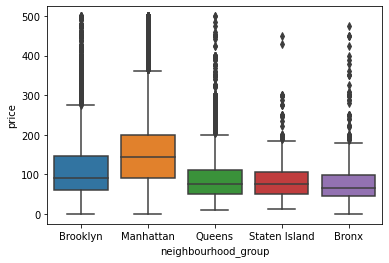

In [43]:
sns.boxplot(data=df0[df0.price<500],x='neighbourhood_group',y='price')
plt.show()

Prices are higher in Manhattan making it one of the more attractive area

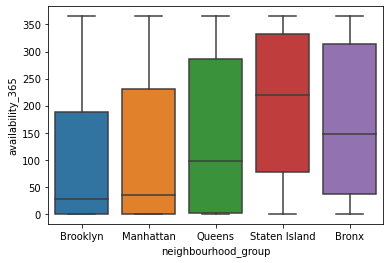

In [42]:
#Availability vs neighbourhood
sns.boxplot(data=df0,x='neighbourhood_group',y='availability_365')
plt.show()

Rooms in Staten Island are least booked even though prices are lower while Brooklyn properties are rented out for more time during the year

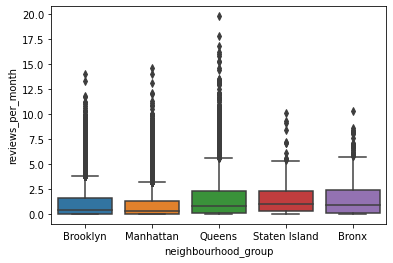

In [41]:
#Reviews vs neighbourhood
sns.boxplot(data=df0[df0.reviews_per_month<20],x='neighbourhood_group',y='reviews_per_month')
plt.show()

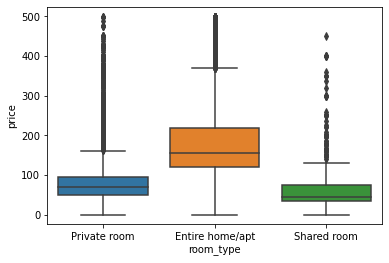

In [40]:
#Price vs Property Type
sns.boxplot(data=df0[df0.price<500],x='room_type',y='price')
plt.show()

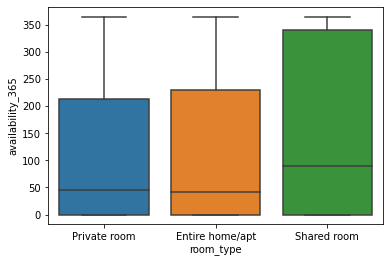

In [49]:
#Availability vs Property Type
sns.boxplot(data=df0,x='room_type',y='availability_365')
plt.show()

Enitre home/apartments are priced higher and yet booked throughout the year making them attractive options for promoting

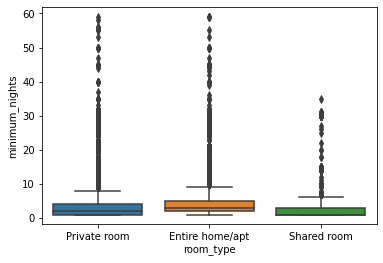

In [39]:
#Availability vs Property Type
sns.boxplot(data=df0[df0.minimum_nights<60],x='room_type',y='minimum_nights')
plt.show()

Hosts prefer to rent out entire home/apartments for longer periods of time

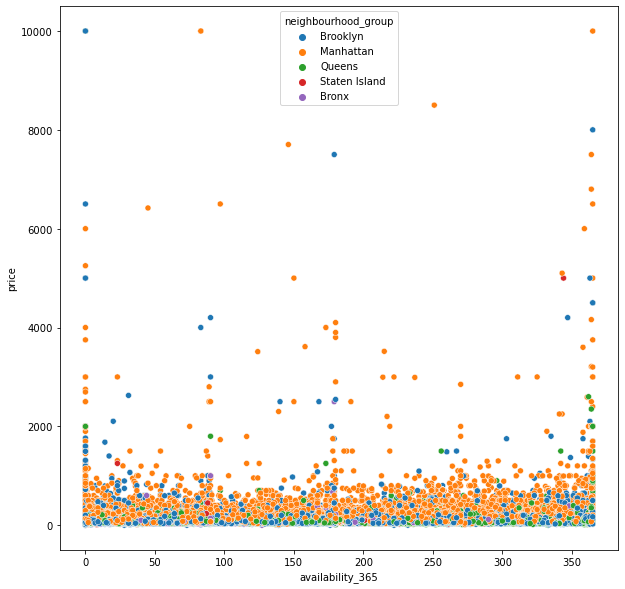

In [37]:
#Price vs Min Nights
plt.figure(figsize=(10,10))
sns.scatterplot(data=df0,x='availability_365',y='price',hue="neighbourhood_group")
plt.show()

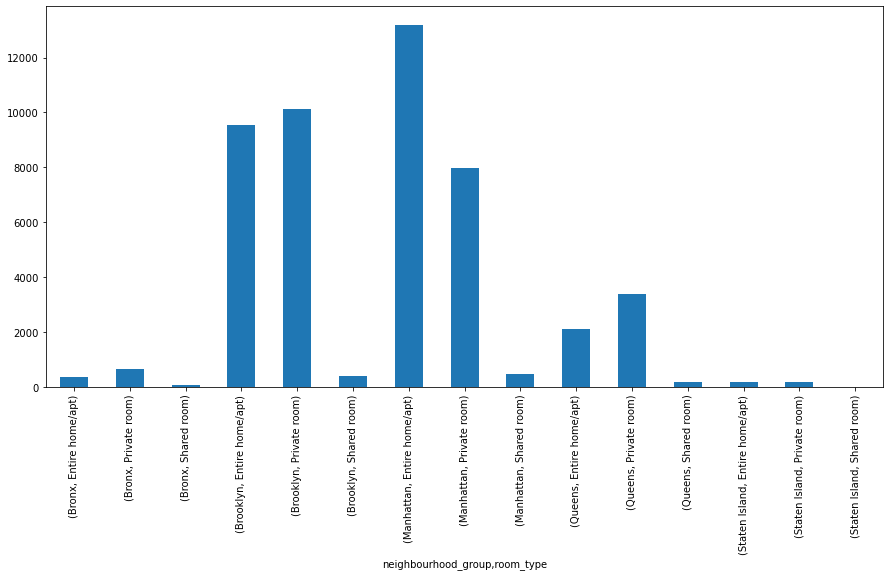

In [64]:
plt.figure(figsize=(15,7))
df0.groupby(['neighbourhood_group','room_type',]).room_type.count().plot(kind='bar')
plt.show()